In [51]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# **Dataviz**

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

path = '/gdrive/My Drive/AI_climate_sea-ice_challenge/'
data = pd.read_csv(path + 'DRIFT_DATA_TRAIN.csv')

data['Ui'] = np.sqrt((data['u_buoy']*data['u_buoy'])+(data['v_buoy']*data['v_buoy']))
data['Uw'] = np.sqrt((data['x_EASE']*data['x_EASE'])+(data['y_EASE']*data['y_EASE']))
data['Ua'] = np.sqrt((data['u_ERA5']*data['u_ERA5'])+(data['v_ERA5']*data['v_ERA5']))
data = data.drop(columns=['year','month','day','doy','h_cs2smos','id_buoy','u_buoy','v_buoy'])
data.head()

,x_EASE,y_EASE,u_ERA5,v_ERA5,sic_CDR,h_piomas,d2c,Ui,Uw,Ua
0,147.506958,138.582672,-6.704156,-0.321260,0.990195,3.189743,522.523298,1.370671,202.394317,6.711849
1,146.834778,120.509880,-6.818630,-0.674205,0.966372,2.484009,412.767669,0.741408,189.955477,6.851881
2,130.993561,129.623672,-8.825469,1.123955,0.996022,2.474106,362.547379,1.187695,184.286759,8.896751
3,147.524719,157.382492,-1.079951,-1.035410,0.982681,3.740522,381.025629,0.920127,215.714607,1.496117
4,147.470963,138.599823,-2.169171,2.537787,0.990302,3.188522,521.535334,1.300527,202.379830,3.338513


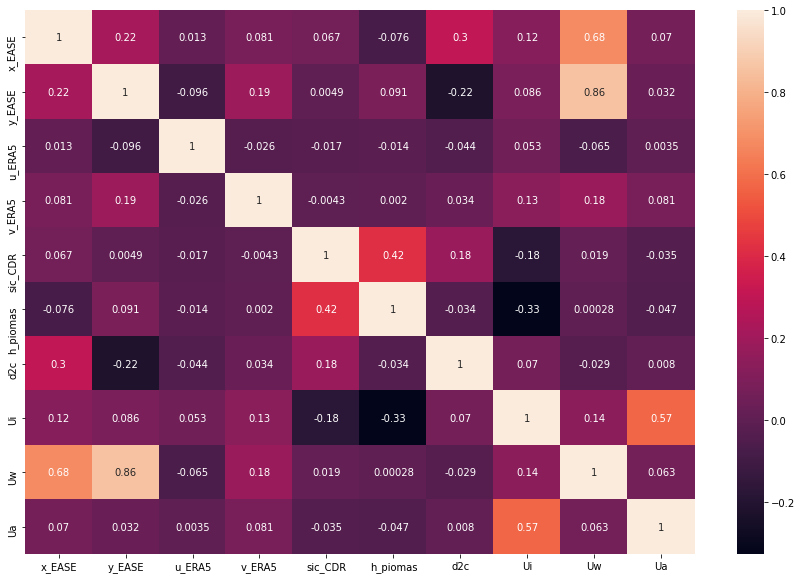

In [ ]:
import seaborn as sns

corrs=data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corrs, annot=True)
plt.show()

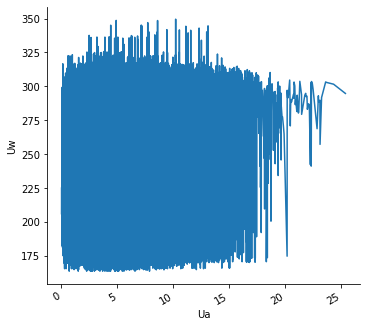

In [ ]:
g = sns.relplot(x="Ua", y="Uw", kind="line", data=data)
g.fig.autofmt_xdate()

# **Model**

In [53]:
x = data.drop(columns = ['Ui'])
y = data['Ui']

In [54]:
x = np.array(x)
y = np.array(y)
y = np.reshape(y,(-1,1))

In [55]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=2)

model.fit(x,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [58]:
from sklearn.metrics import mean_squared_error 

pred_y = model.predict(x)
mse =mean_squared_error(y, pred_y)
print("Mean Squared Error:",mse)

Mean Squared Error: 8.72252118891646


In [59]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 2.9533914723443724


#**Test set prediction**

In [ ]:
data_test = pd.read_csv(path + 'DRIFT_DATA_TEST.csv')

data_test = data_test.drop(columns=['year','month','day','doy','h_cs2smos','id_buoy','u_buoy','v_buoy'])
data_test['Uw'] = np.sqrt((data_test['x_EASE']*data_test['x_EASE'])+(data_test['y_EASE']*data_test['y_EASE']))
data_test['Ua'] = np.sqrt((data_test['u_ERA5']*data_test['u_ERA5'])+(data_test['v_ERA5']*data_test['v_ERA5']))

In [ ]:
x = data_test

In [ ]:
prediction = model.predict(x)

In [ ]:
np.savetxt(path + "prediction_velocity.csv",prediction, delimiter=",")